# categorical

In [1]:
import lightgbm as lgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Create LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Set parameters for classification
params = {
    'objective': 'multiclass', # Use multiclass objective for multi-class classification
    'num_class': 3, # Number of classes
    'metric': 'multi_error', # Use multi_error for multi-class classification
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'verbosity': -1, # Set verbosity to -1 to suppress output
    'seed': 42
}

# Train the model
num_round = 100
clf = lgb.train(params, train_data, num_round,
                valid_sets=[test_data],
                callbacks=[lgb.early_stopping(stopping_rounds=10)]) # Use early stopping callback

# Predict on the test set
y_pred = clf.predict(X_test)
y_pred = [list(x).index(max(x)) for x in y_pred]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_error: 0
Accuracy: 1.0


# Regression

In [2]:
import lightgbm as lgb
from sklearn.datasets import fetch_california_housing # Use California housing dataset instead
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)

# Create LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Set parameters for regression
params = {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'metric': 'rmse',
    'verbosity': -1,
    'seed': 42
}

# Train the model
num_round = 100
reg = lgb.train(params, train_data, num_round, valid_sets=[test_data],
                callbacks=[lgb.early_stopping(stopping_rounds=10)])

# Predict on the test set
y_pred = reg.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 0.484058
RMSE: 0.484057560212197


# Ranking

In [3]:
import lightgbm as lgb
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

# Load dataset (query, features, relevance)
X_train, y_train = load_svmlight_file('train.txt', query_id=True)
X_test, y_test = load_svmlight_file('test.txt', query_id=True)

# Create LightGBM dataset for ranking
train_data = lgb.Dataset(X_train, label=y_train, group=[X_train.queryid])
test_data = lgb.Dataset(X_test, label=y_test, group=[X_test.queryid])

# Set parameters for ranking
params = {
    'objective': 'lambdarank',
    'metric': 'ndcg',
    'verbosity': -1,
    'seed': 42
}

# Train the model
num_round = 100
rank = lgb.train(params, train_data, num_round, valid_sets=[test_data], early_stopping_rounds=10)

FileNotFoundError: [Errno 2] No such file or directory: 'train.txt'

In [14]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 13.9 MB/s eta 0:00:00


In [15]:
import lightgbm as lgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error
import shap
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset shape
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")



Training data shape: (455, 30)
Testing data shape: (114, 30)


In [16]:
# Create a LightGBM dataset
d_train = lgb.Dataset(X_train, label=y_train)

# Set parameters
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the model
clf = lgb.train(params, d_train, num_boost_round=100)

# Predict on the test set
y_pred = clf.predict(X_test)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'ROC AUC: {roc_auc}')


[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

# Hyperparameter Tune with grid search

In [17]:
param_grid = {
    'num_leaves': [31, 63],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'verbose': [-1]
}

# Initialize the model
model = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print(f'Best parameters: {grid_search.best_params_}')

# Best model
best_model = grid_search.best_estimator_

# Predict and evaluate with the best model
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)
print(f'Best Model Accuracy: {accuracy_best}')
print(f'Best Model ROC AUC: {roc_auc_best}')


Best parameters: {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 31, 'verbose': -1}
Best Model Accuracy: 0.9649122807017544
Best Model ROC AUC: 0.9580740255486406


# Handling Imbalanced Data

In [18]:
# Set parameters to handle imbalance
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'scale_pos_weight': 2,  # Adjust based on the imbalance ratio
    # Add other parameters as needed
    # verbose: -1 to suppress output
    'verbosity': -1,

}

# Train the model
clf = lgb.train(params, d_train, num_boost_round=100)

# Predict on the test set and evaluate
y_pred = clf.predict(X_test)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]
accuracy = accuracy_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)
print(f'Accuracy: {accuracy}, ROC AUC: {roc_auc}')


Accuracy: 0.956140350877193, ROC AUC: 0.9918113331149689


# Feature Importance

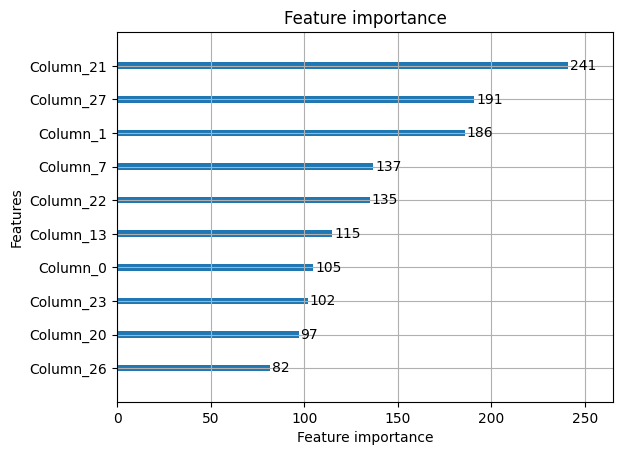

/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


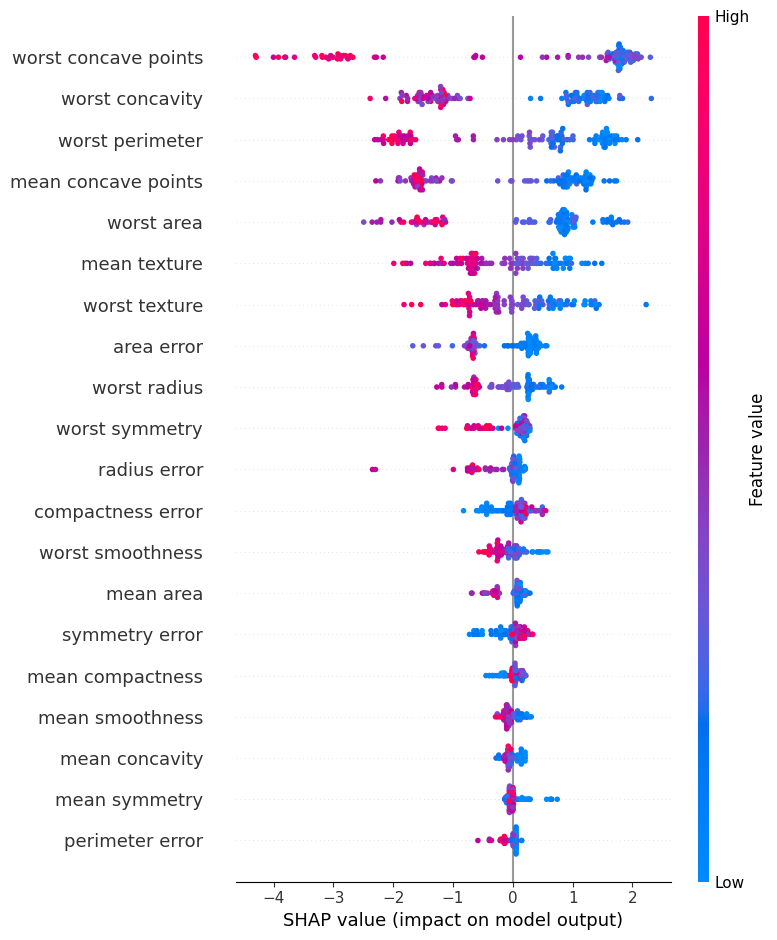

In [19]:
# Train the model again
clf = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', verbosity=-1, random_state=42)
clf.fit(X_train, y_train)

# Plot feature importance
lgb.plot_importance(clf, max_num_features=10)
plt.show()

# SHAP values (for interpretability)
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=data.feature_names)


# Using LightGBM with Large-Scale Data

In [20]:
# Set parameters for large-scale data
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss',
    'num_leaves': 128,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'max_bin': 255,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    # 'device': 'gpu'  # Use GPU if available
}

# Train the model
clf = lgb.train(params, d_train, num_boost_round=1000, valid_sets=[d_train],
                callbacks=[lgb.early_stopping(stopping_rounds=10)])

# Predict and evaluate
y_pred = clf.predict(X_test)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]
accuracy = accuracy_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)
print(f'Accuracy: {accuracy}, ROC AUC: {roc_auc}')


/usr/local/lib/python3.10/dist-packages/lightgbm/callback.py:341: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")


Accuracy: 0.9736842105263158, ROC AUC: 0.9931215198165739


# Saving the model

In [21]:
# Save the model
clf.save_model('lightgbm_model.txt')

# Load the model
loaded_model = lgb.Booster(model_file='lightgbm_model.txt')

# Predict with the loaded model
y_pred = loaded_model.predict(X_test)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]
accuracy = accuracy_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)
print(f'Loaded Model Accuracy: {accuracy}')
print(f'Loaded Model ROC AUC: {roc_auc}')


Loaded Model Accuracy: 0.9736842105263158
Loaded Model ROC AUC: 0.9931215198165739
